<a href="https://colab.research.google.com/github/alqamahsayeed12/Air-Quality-Trainings/blob/Module-4/Module_4_CAMS_visualization_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Copyright UCAR (c) 2023**


 University Corporation for Atmospheric Research(UCAR)
 NSF National Center for Atmospheric Research(NCAR)
 Research Applications Laboratory(RAL)
 P.O.Box 3000, Boulder, Colorado, 80307-3000, USA

**Name:**  CAMS_visualization_analysis.ipynb

**Data used:**   the Copernicus Atmosphere Monitoring Service (CAMS) ECMWF Atmospheric Composition Reanalysis 4 (EAC4).



As a guideline for navigating the Jupyter notebook,
users should note that for each visualization,
there exists a corresponding "set your input" cell,
proceed to the subsequent cell, where they can define their desired input,
enabling them to modify the visualizations according to their preferences.


users should locating the "set your input" cell,  
              
 **Author:      *Shima Shams*** (NCAR)

 **Created:     2023-2024**

 **Licence:     None**

 Link - https://ads.atmosphere.copernicus.eu/datasets/cams-global-reanalysis-eac4?tab=overview

In [ ]:
# Import the 'drive' module from the 'google.colab' library.
# This module provides functions for interacting with Google Drive.
from google.colab import drive

# Mount your Google Drive to the Colab environment.
# '/content/drive' is the location where your Drive will be mounted.
# 'force_remount=True' ensures the Drive is remounted even if previously mounted.
drive.mount('/content/drive', force_remount=True)

# Define a variable named 'NEED_PIP_INSTALL' and set it to True.
# This variable might be used later to control package installation.
# The comment suggests setting it to True for the first run of the notebook.
NEED_PIP_INSTALL = True # set true first time run

Mounted at /content/drive


# Import python libraries

In [ ]:
# Install the 'cartopy' package.
# 'cartopy' is a Python library used for creating maps and working with geospatial data.
# It provides tools for map projections, drawing coastlines, and other geographic features.
!pip install cartopy

# Install the 'cdsapi' package.
# 'cdsapi' is the Climate Data Store Application Program Interface (API) client.
# It allows you to programmatically access and download data from the Climate Data Store (CDS),
# which is a repository of climate and meteorological datasets.
!pip install cdsapi

In [ ]:
# Import the 'cdsapi' library for accessing climate data from the Climate Data Store.
import cdsapi

# Import 'numpy' for numerical computations, using the alias 'np' for brevity.
import numpy as np

# Import 'os' for interacting with the operating system (e.g., file manipulation).
import os

# Import 'pandas' for data analysis and manipulation, using the alias 'pd'.
import pandas as pd

# Import 'glob' for finding files and directories matching a pattern.
from glob import glob

# Import 'xarray' for working with labeled multi-dimensional arrays, using the alias 'xr'.
import xarray as xr

# Import 'math' for standard mathematical functions.
import math

# Import 'dask' for parallel computing and handling large datasets.
import dask

# Import 'warnings' and filter out warning messages to avoid cluttering the output.
import warnings
warnings.filterwarnings("ignore")

# Import 'matplotlib.pyplot' for plotting, using the alias 'plt'.
import matplotlib.pyplot as plt

# Import 'matplotlib.dates' for working with dates and times on plot axes.
import matplotlib.dates as mdates

# Import 'cartopy' for creating maps and working with geospatial data.
import cartopy

# Import 'cartopy.crs' for accessing different map projections, using the alias 'ccrs'.
import cartopy.crs as ccrs

# Import the 'cartopy.feature' module for adding geographical features to maps.
# We use 'cfeature' as an alias for convenience.
import cartopy.feature as cfeature

# Import the 'cartopy.crs' module for working with coordinate reference systems (map projections).
# We use 'ccrs' as an alias.
import cartopy.crs as ccrs

# Import the 'Reader' class from 'cartopy.io.shapereader' for reading shapefiles.
# Shapefiles are a common format for storing geospatial vector data.
from cartopy.io.shapereader import Reader

# Import the 'ShapelyFeature' class from 'cartopy.feature' to create map features from Shapely geometries.
# Shapely is a library for manipulating geometric objects.
from cartopy.feature import ShapelyFeature

# Import the 'matplotlib' library as 'mpl' for creating visualizations.
# Matplotlib is used for creating the base maps and adding cartographic elements.
import matplotlib as mpl



# Data Directories and Input

In [ ]:
# Define file paths and other constants
# 'root' stores the base path to the Google Drive folder where data is stored.
# This is likely running in a Google Colab environment.
root = "/content/drive/MyDrive/Guatemala_Training/"

# Construct the full path to the CAMS data directory by joining 'root' with '/CAMS/Data/'.
cams_data_dir = root + '/CAMS/Data/'

# Similarly, create paths for storing output files and plots.
output_path = root + '/CAMS/OutPut/'
output_path_plots = root + '/CAMS/Plots/'

# The following lines ensure that the necessary directories exist.
# 'os.path.exists()' checks if a path exists.
# 'os.makedirs()' creates the directory and any parent directories if they don't exist.
# This prevents errors if the directories are not already present.

if not os.path.exists(cams_data_dir):
    os.makedirs(cams_data_dir)
if not os.path.exists(output_path):
    os.makedirs(output_path)
if not os.path.exists(output_path_plots):
    os.makedirs(output_path_plots)

# Define variables related to the chemical species being analyzed.
# 'species' is set to 'no2', representing nitrogen dioxide.
# Commented-out lines suggest options for other species like ozone ('go3')
# or particulate matter ('pm2p5').
species = 'no2'

# 'mole_weight' stores the molecular weight of the selected species,
# currently set to 46.0055 for nitrogen dioxide.
mole_weight = 46.0055

# **Section I - DATA DOWNLOAD**

In [ ]:
# --- API Authentication ---
# Define your API key.
# Replace 'YOUR_API_KEY' with the key you obtained from the ECMWF website after registering.
# This key is essential for authenticating your requests to the API.
api_key = "452d811f-3de3-4aa8-814b-7aace4185163"

# --- Creating the API Client ---
# Create a Client object to interact with the CAMS API.
# This object will handle communication with the API server.
c = cdsapi.Client(
    url='https://ads.atmosphere.copernicus.eu/api/',  # The URL of the CAMS API endpoint.
    key=api_key,  # Your API key for authentication.
    timeout=600,  # Set a timeout of 600 seconds (10 minutes) for API requests.
    quiet=False  # Enable progress messages and information about API requests.
)

# --- Now you're ready to use the API! ---
# The 'c' object can now be used to make requests to the CAMS API, such as downloading data.
# For example, to retrieve data about nitrogen dioxide (NO2) levels, you would use the 'c.retrieve()' method
# with appropriate parameters. Refer to the CAMS API documentation for details on how to structure your requests.

# Example: (This is a simplified example and may need adjustments based on the specific data you want)
# c.retrieve(
#     'cams-global-atmospheric-composition-forecasts',  # The name of the dataset you want to access.
#     {
#         'variable': 'nitrogen_dioxide',  # The specific variable within the dataset.
#         'date': '2023-11-15/2023-11-16',  # The date range for the data.
#         'format': 'netcdf'  # The desired output format (e.g., NetCDF).
#     },
#     'output_file.nc'  # The name of the file to save the downloaded data to.
# )

2024-11-15 17:59:23,681 INFO [2024-09-26T00:00:00] **Welcome to the New Atmosphere Data Store (ADS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new ADS for the benefit of everyone. Thank you.
INFO:cads_api_client.legacy_api_client:[2024-09-26T00:00:00] **Welcome to the New Atmosphere Data Store (ADS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new ADS for the benefit of everyone. Thank you.
2024-11-15 17:59:23,684 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics

In [ ]:
# --- Setting the Time Range ---
# Define the start and end dates for the analysis.
# pd.to_datetime() converts strings to datetime objects for easier date handling.
start = pd.to_datetime("20130101")  # Start date
end = pd.to_datetime("20231231")  # End date

# Define the geographical boundaries for the analysis.
# Maximum Latitude:
lat_max = 22.0
# Maximum Longitude:
lon_max = -74.0
# Minimum Latitude:
lat_min = 5.0
# Minimum Longitude:
lon_min = -107.0


# --- Defining Variables of Interest ---
# Create a dictionary to store the variables for the analysis.
# The dictionary is organized by categories: 'aer' for aerosols and 'gas' for gases.
variables = dict(
    aer =  [

        #"black_carbon_aerosol_optical_depth_550nm",
        #"dust_aerosol_optical_depth_550nm",

        #"organic_matter_aerosol_optical_depth_550nm",
        "particulate_matter_1um",
        "particulate_matter_2.5um",
        "particulate_matter_10um",
        #"sea_salt_aerosol_optical_depth_550nm",
        #"sulphate_aerosol_optical_depth_550nm",
        #"total_aerosol_optical_depth_469nm",
        #"total_aerosol_optical_depth_550nm",
        #"total_aerosol_optical_depth_670nm",
        #"total_aerosol_optical_depth_865nm",
        #"total_aerosol_optical_depth_1240nm",
        #"total_column_carbon_monoxide",
        #"total_column_ethane",
        #"total_column_formaldehyde",
        #"total_column_hydrogen_peroxide",
        #"total_column_hydroxyl_radical",
        #"total_column_isoprene",
        #"total_column_methane",
        #"total_column_nitric_acid",
        #"total_column_nitrogen_dioxide",
        #"total_column_nitrogen_monoxide",
        #"total_column_ozone",
        #"total_column_peroxyacetyl_nitrate",
        #"total_column_propane",
        #"total_column_sulphur_dioxide",
        #"total_column_water_vapour"
    ],
    gas = [
        #'carbon_monoxide',
        #   'ethane',
        #   'formaldehyde',
        #   'hydrogen_peroxide',
        #   'hydroxyl_radical',
        #   'isoprene',
        #    'nitric_acid',
            'nitrogen_dioxide',
        #   'nitrogen_monoxide',
            'ozone',
        #   'peroxyacetyl_nitrate',
         #  'propane',
         #   'sulphur_dioxide'
        ],

    #met = ["10m_u_component_of_wind",
    #    "10m_v_component_of_wind",
    #    "2m_temperature",
    #       "land_sea_mask",
    #    "mean_sea_level_pressure",
    #       ]
    )


In [ ]:
while start <= end:
    end1 = start + pd.DateOffset(months=1) - pd.DateOffset(days=1)

    # Loop through each type of atmospheric variable ('aer' for aerosols, 'gas' for gases)
    for vartype in variables.keys():
        # Create a base file name using the variable type (e.g., 'CAMS_aer')
        parentstring = f'CAMS_{vartype}'

        # Construct the full file name with start and end dates and .nc extension
        filename = f'{parentstring}_{start.strftime("%Y%m%d")}_{end1.strftime("%Y%m%d")}_subset.nc'

        # Format the date range for the data request
        date_range = f"{start.strftime('%Y-%m-%d')}/{end1.strftime('%Y-%m-%d')}"

        # Check if the data file already exists in the designated directory
        if os.path.isfile(cams_data_dir + filename):
            print(f'File Already Downloaded = {filename}') # Print a message if the file exists
        else:  # If the file doesn't exist, proceed with downloading
            # Use the 'c' object (from cdsapi) to retrieve data from CAMS
            print ([lat_max, lon_min, lat_min,lon_max])
            c.retrieve(
                'cams-global-reanalysis-eac4', # Specify the dataset name
                {
                    'date': date_range,  # Provide the date range
                    'format': 'netcdf',  # Set the output format to NetCDF
                    'variable': variables[vartype],  # Select the variables based on the current 'vartype'
                    'area': [lat_max, lon_min, lat_min,lon_max],
                    'time': [ # Specify the times of day for data retrieval
                        "00:00", "03:00", "06:00",
                        "09:00", "12:00", "15:00",
                        "18:00", "21:00"
                    ],
                    "model_level": ["60"], # Specify the model level (if applicable); 60 for surface
                },
                cams_data_dir + filename # Define the file path for saving the downloaded data
            )

            # Verify if the download was successful by checking for the file's existence
            if not os.path.isfile(cams_data_dir + filename):
                print(f'File Not Downloaded = {filename}') # Print a message if the download failed
    start += pd.DateOffset(months=1)

File Already Downloaded = CAMS_aer_20130101_20130131_subset.nc
File Already Downloaded = CAMS_gas_20130101_20130131_subset.nc
File Already Downloaded = CAMS_aer_20130201_20130228_subset.nc
File Already Downloaded = CAMS_gas_20130201_20130228_subset.nc
File Already Downloaded = CAMS_aer_20130301_20130331_subset.nc
File Already Downloaded = CAMS_gas_20130301_20130331_subset.nc
File Already Downloaded = CAMS_aer_20130401_20130430_subset.nc
File Already Downloaded = CAMS_gas_20130401_20130430_subset.nc
File Already Downloaded = CAMS_aer_20130501_20130531_subset.nc
File Already Downloaded = CAMS_gas_20130501_20130531_subset.nc
File Already Downloaded = CAMS_aer_20130601_20130630_subset.nc
File Already Downloaded = CAMS_gas_20130601_20130630_subset.nc
File Already Downloaded = CAMS_aer_20130701_20130731_subset.nc
File Already Downloaded = CAMS_gas_20130701_20130731_subset.nc
File Already Downloaded = CAMS_aer_20130801_20130831_subset.nc
File Already Downloaded = CAMS_gas_20130801_20130831_su

# Functions

In [ ]:
# Function to calculate air density
def calculate_air_density(sp, q, t):
    """
    Calculates the density of air.

    Parameters:
        sp (float): Surface pressure (likely in Pascals or hPa).
        q (float): Specific humidity (unitless, kg of water vapor per kg of air).
        t (float): Temperature (likely in Kelvin).

    Returns:
        float: Air density (likely in kg/m^3).
    """

    # Calculate the partial pressure of dry air (p_dry)
    # This formula accounts for the pressure exerted by water vapor
    p_dry = sp * (1 - q * 28.96 / 18)  # 28.96 and 18 are related to molecular weights of air and water

    # Define the specific gas constant for dry air (R)
    R = 287.0500676  # Units: J/(kg*K)

    # Calculate air density using the ideal gas law: density = pressure / (R * temperature)
    air_density = p_dry / (R * t)

    # This part likely assumes air_density is an xarray DataArray
    # and renames a dimension or coordinate from 'sp' to 'air_d'
    # It's not essential for the core density calculation
    air_density = air_density.rename({'sp': 'air_d'})

    return air_density  # Return the calculated air density


# Function to calculate specific humidity
def calculate_specific_humidity(T, T_d, sp):
    """
    Calculates the specific humidity of the air.

    Parameters:
        T (float): Temperature in Celsius.
        T_d (float): Dew point temperature in Celsius.
        sp (float): Surface pressure (likely in Pascals or hPa).

    Returns:
        float: Specific humidity (unitless, kg of water vapor per kg of air).
    """

    # Calculate water vapor pressure (e) using the August-Roche-Magnus approximation
    # This formula estimates vapor pressure based on dew point temperature
    e = 6.112 * math.exp((17.67 * T_d) / (T_d + 243.5))  # e is likely in hPa or mb

    # Calculate specific humidity (q) using the formula:
    # q = (0.622 * e) / (sp - 0.378 * e)
    # 0.622 and 0.378 are related to the ratios of molecular weights of water vapor and dry air
    specific_humidity = (0.622 * e) / (sp - 0.378 * e)

    return specific_humidity  # Return the calculated specific humidity

# Set the name of species that you want to be printed on the plots

In [ ]:
# Define a variable to store the chemical species code.
# In this case, it's set to 'pm2p5', representing particulate matter 2.5.
species = 'pm2p5'

# Now, we want to create a more readable version of the species code for display.
# We'll use an if-elif-else block to handle different cases:

if species == 'pm2p5':
    # If the species is 'pm2p5', assign 'PM2.5' to the species_str variable.
    # This provides a more formatted representation for particulate matter 2.5.
    species_str = 'PM2.5'
elif species == 'go3':
    # If the species is 'go3', assign 'O3' to the species_str variable.
    # This provides a more common representation for ground-level ozone.
    species_str = 'O3'
else:
    # If the species is neither 'pm2p5' nor 'go3',
    # convert the original species code to uppercase and store it in species_str.
    # This ensures that other species are displayed in a standardized format.
    species_str = species.upper()

# Now, the species_str variable holds a more presentable version of the species code,
# which can be used for labeling plots, tables, or other outputs.

# Reading data

In [ ]:
# --- Reading Data from Files ---

# 1. Find all data files
# glob() is used to find all files matching a pattern in a directory.
# In this case, it's looking for files ending with '_1.nc'
# in the directory specified by 'cams_data_dir'.
file_name_data = glob(cams_data_dir + '*_subset.nc')

# 2. Sort the file list
# This ensures the files are processed in a consistent order,
# which is important for time-series data.
file_name_data.sort()

# 3. Display the file list
# This line, when executed in a Jupyter notebook, will print the
# list of files that were found. This is useful for verifying that
# the correct files have been identified.
file_name_data

['/content/drive/MyDrive/Guatemala_Training//CAMS/Data/CAMS_aer_20130101_20130131_subset.nc',
 '/content/drive/MyDrive/Guatemala_Training//CAMS/Data/CAMS_aer_20130201_20130228_subset.nc',
 '/content/drive/MyDrive/Guatemala_Training//CAMS/Data/CAMS_aer_20130301_20130331_subset.nc',
 '/content/drive/MyDrive/Guatemala_Training//CAMS/Data/CAMS_aer_20130401_20130430_subset.nc',
 '/content/drive/MyDrive/Guatemala_Training//CAMS/Data/CAMS_aer_20130501_20130531_subset.nc',
 '/content/drive/MyDrive/Guatemala_Training//CAMS/Data/CAMS_aer_20130601_20130630_subset.nc',
 '/content/drive/MyDrive/Guatemala_Training//CAMS/Data/CAMS_aer_20130701_20130731_subset.nc',
 '/content/drive/MyDrive/Guatemala_Training//CAMS/Data/CAMS_aer_20130801_20130831_subset.nc',
 '/content/drive/MyDrive/Guatemala_Training//CAMS/Data/CAMS_aer_20130901_20130930_subset.nc',
 '/content/drive/MyDrive/Guatemala_Training//CAMS/Data/CAMS_aer_20131001_20131031_subset.nc',
 '/content/drive/MyDrive/Guatemala_Training//CAMS/Data/CAMS_

In [ ]:
# --- Data Handling and Organization ---

# 1. File Separation Logic:
# This variable controls how the data files are merged.
# If files have the same variables but different time periods, set to 'temporal'.
# If files have the same time period but different variables, set to 'variables'.
files_separation = 'variables'  # In this case, assuming files have different variables

# 2. Opening and Combining Files:
# Use xarray to open and combine multiple NetCDF files into a single dataset.
if files_separation == 'variables':
    # If files have different variables, assume they cover the same time range.
    datasets = []
    for fn in file_name_data[:5]:
        air_q = xr.open_dataset(fn)
        if air_q.longitude.values.min() > 180:
            air_q['longitude'] = air_q['longitude'] - 360
        if 'model_level' in air_q.coords:
            air_q = air_q.isel(model_level=0)
        #display (air_q)
        # Add the current Dataset to the list
        datasets.append(air_q)
    air_q = xr.merge(datasets)

# 4. Renaming and Sorting:
# Rename dimensions and variables for consistency.
air_q = air_q.rename_dims(dims_dict={'valid_time': 'time'})  # Rename dimension 'valid_time' to 'time'
air_q = air_q.rename(name_dict={'valid_time': 'time'})  # Rename variable/coordinate 'valid_time' to 'time'
# Sort the data chronologically by the 'time' dimension.
air_q = air_q.sortby('time')

# 5. Displaying the Dataset:
# Show the contents of the combined and organized dataset.
display(air_q)


<xarray.Dataset> Size: 15MB
Dimensions:    (time: 1208, latitude: 23, longitude: 45)
Coordinates:
  * time       (time) datetime64[ns] 10kB 2013-01-01 ... 2013-05-31T21:00:00
  * latitude   (latitude) float64 184B 21.5 20.75 20.0 19.25 ... 6.5 5.75 5.0
  * longitude  (longitude) float64 360B -107.0 -106.2 -105.5 ... -74.75 -74.0
Data variables:
    pm1        (time, latitude, longitude) float32 5MB 5.504e-09 ... 9.181e-09
    pm2p5      (time, latitude, longitude) float32 5MB 9.221e-09 ... 1.459e-08
    pm10       (time, latitude, longitude) float32 5MB 1.399e-08 ... 1.947e-08
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-15T13:28 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
# Check if the processed data file already exists.
# The file name is constructed using f-string formatting to include relevant information
# like the bounding box coordinates (lat_min, lat_max, lon_min, lon_max).
if not os.path.exists(output_path + f'CAMS_hourly_Averages_bbox_{int(lat_min)}lat_to_{int(lat_max)}_{int(lon_min)}_to_{int(lon_max)}lon.nc'):
    # If the file does NOT exist, save the current 'air_q' dataset to a NetCDF file.
    # 'air_q.to_netcdf()' is used for this purpose.
    print("Saving processed data to NetCDF file...")  # Optional: Print a message to indicate saving
    air_q.to_netcdf(output_path + f'CAMS_hourly_Averages_bbox_{int(lat_min)}lat_to_{int(lat_max)}_{int(lon_min)}_to_{int(lon_max)}lon.nc')
else:
    # If the file DOES exist, load the data from the file into the 'air_q' variable.
    # 'xr.open_dataset()' is used to open and load the NetCDF file.
    print("Loading processed data from NetCDF file...")  # Optional: Print a message to indicate loading
    air_q = xr.open_dataset(output_path + f'CAMS_hourly_Averages_bbox_{int(lat_min)}lat_to_{int(lat_max)}_{int(lon_min)}_to_{int(lon_max)}lon.nc')

Loading processed data from NetCDF file...


In [ ]:
# Print a message to the console indicating we're about to examine the metadata
print('\n ****** Detailed look at the metadata ******')

# Display the metadata associated with the 'air_q' dataset
# 'air_q.attrs' accesses the metadata dictionary of the dataset
# 'display()' presents this metadata in a formatted way in the Jupyter notebook
display(air_q.attrs)

# Create an empty dictionary called 'input_attributes' to store metadata
input_attributes = {}

# Save the metadata from 'air_q.attrs' into the 'input_attributes' dictionary
# We use the key 'global' to organize this metadata within the dictionary
# This is likely for later use, such as when saving the processed data
input_attributes['global'] = air_q.attrs


 ****** Detailed look at the metadata ******


{'GRIB_centre': 'ecmf',
 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts',
 'GRIB_subCentre': 0,
 'Conventions': 'CF-1.7',
 'institution': 'European Centre for Medium-Range Weather Forecasts',
 'history': '2024-11-15T13:28 GRIB to CDM+CF via cfgrib-0.9.14.1/ecCodes-2.36.0 with {"source": "data.grib", "filter_by_keys": {"typeOfLevel": "surface"}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}

# Unit conversions

In [ ]:
# Unit conversions and data manipulation

# This section performs unit conversions for different atmospheric pollutants,
# calculates daily averages, adjusts longitude values, and adds metadata.

# Check which pollutant we're working with and apply the appropriate conversions
if species == 'pm2p5':
    # If it's PM2.5:
    # - Multiply the raw data by 1e9 (1 billion) to convert to micrograms per cubic meter (ug/m^3)
    concentration = 1e9 * air_q[species]
    # - Add units attribute to the daily concentration data
    concentration.attrs['units'] = 'µg/m³'
elif species == 'no2':
    # If it's NO2:
    # - Multiply by 1e9 and apply a conversion factor (28.96 / 46.01) to convert to parts per billion by volume (ppbv)
    concentration = 1e9 * air_q[species] * 28.96 / 46.01
    # - Add units attribute
    concentration.attrs['units'] = 'ppbv'
elif species == 'go3':
    # If it's ground-level ozone (O3):
    # - Multiply by 1e9 and apply a conversion factor (28.96 / 48.0)
    concentration = 1e9 * air_q[species] * 28.96 / 48.0
    # - Calculate daily averages
    # - Add units attribute
    concentration.attrs['units'] = 'ppbv'
# Return the final processed daily concentration data
concentration

<xarray.DataArray 'pm2p5' (time: 32136, latitude: 23, longitude: 45)> Size: 133MB
array([[[9.22077084e+00, 8.95707417e+00, 9.86988735e+00, ...,
         1.25191383e+01, 1.34800415e+01, 1.24555664e+01],
        [9.69628048e+00, 9.40663433e+00, 9.00939178e+00, ...,
         1.01955853e+01, 1.08281603e+01, 1.06062441e+01],
        [1.04590616e+01, 9.96595955e+00, 9.16883755e+00, ...,
         9.06978035e+00, 8.31045151e+00, 8.25587463e+00],
        ...,
        [1.79718399e+00, 1.27254057e+00, 8.87504518e-01, ...,
         1.35929394e+01, 1.18901806e+01, 1.30325413e+01],
        [2.05656052e+00, 1.51298821e+00, 1.09768307e+00, ...,
         1.81159286e+01, 1.48549767e+01, 1.16843433e+01],
        [2.05852151e+00, 1.73113191e+00, 1.36568558e+00, ...,
         1.87707081e+01, 2.33910122e+01, 1.99917107e+01]],

       [[8.42823219e+00, 8.44812012e+00, 9.66827869e+00, ...,
         1.33036928e+01, 1.41758690e+01, 1.29050140e+01],
        [9.03652096e+00, 9.05920887e+00, 8.78856277e+00, ...,
         1.09400291e+01, 1.14642391e+01, 1.15812511e+01],
        [9.82157803e+00, 9.26307011e+00, 8.46381664e+00, ...,
         9.42564201e+00, 8.74155331e+00, 8.96523952e+00],
...
        [3.00640583e+00, 3.19197106e+00, 4.01723814e+00, ...,
         1.65310745e+01, 1.60683689e+01, 1.94209232e+01],
        [2.83579016e+00, 2.92318702e+00, 3.15598917e+00, ...,
         1.88938293e+01, 1.75739956e+01, 1.95851021e+01],
        [3.08421016e+00, 3.15388608e+00, 3.36721945e+00, ...,
         1.79458084e+01, 1.73122883e+01, 1.85423508e+01]],

       [[1.77649900e-01, 2.55795370e-04, 0.00000000e+00, ...,
         3.44488168e+00, 3.02119923e+00, 2.33099222e+00],
        [3.08034480e-01, 1.04691364e-01, 0.00000000e+00, ...,
         4.32311249e+00, 3.63188243e+00, 4.11607456e+00],
        [1.08826727e-01, 1.03725031e-01, 0.00000000e+00, ...,
         5.22004461e+00, 5.53285408e+00, 6.30269861e+00],
        ...,
        [2.99982619e+00, 3.34857464e+00, 4.27618837e+00, ...,
         1.55652342e+01, 1.41788521e+01, 1.81308479e+01],
        [2.68029499e+00, 2.87725759e+00, 3.08538961e+00, ...,
         1.87998524e+01, 1.60253963e+01, 1.83018894e+01],
        [2.84289575e+00, 2.70078707e+00, 2.80019212e+00, ...,
         1.61957703e+01, 1.77967930e+01, 2.07780170e+01]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 257kB 2013-01-01 ... 2023-12-31T21:00:00
  * latitude     (latitude) float64 184B 21.5 20.75 20.0 19.25 ... 6.5 5.75 5.0
  * longitude    (longitude) float64 360B -107.0 -106.2 -105.5 ... -74.75 -74.0
    model_level  float64 8B ...
Attributes:
    units:    µg/m³

# plot recent n records of data for a location

In [ ]:
# --- Setting Location and Data Selection Parameters ---

# 1. Define the city and its coordinates:
city = 'Guatemala City'  # Name of the city for labeling and display
lat = 14.6349  # Latitude of Guatemala City
lon = -90.5069  # Longitude of Guatemala City

# 2. Specify the number of recent records to analyze:
n = 2920  # This will limit the analysis to the last 10 days of data



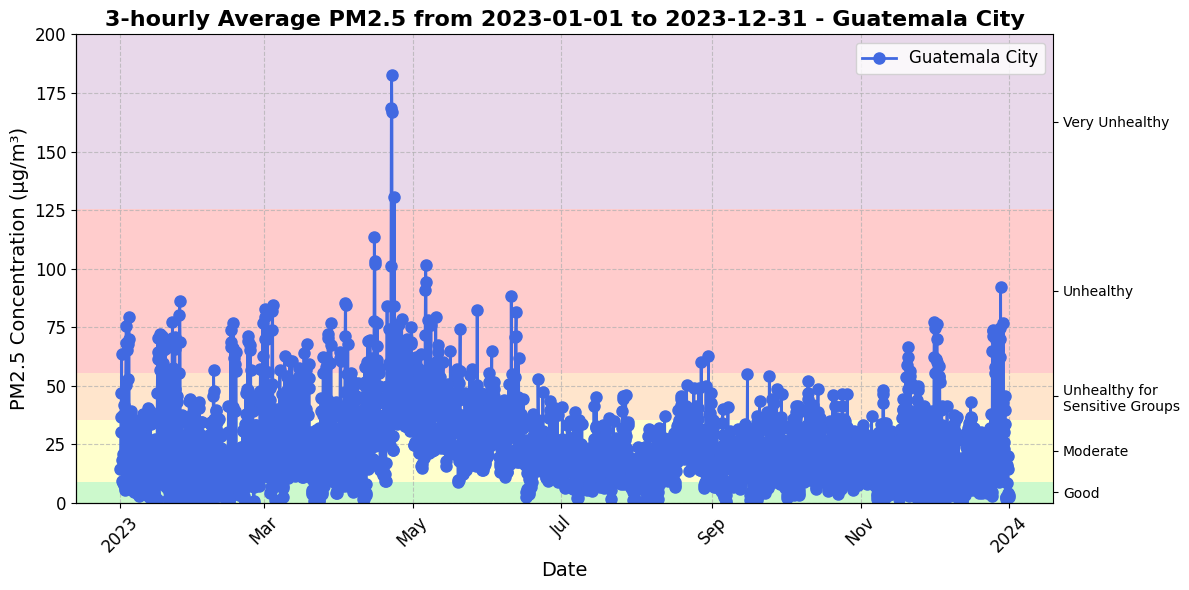

In [ ]:
# --- Data Selection and Filtering ---

# Select data for the specified location (lat, lon) using nearest neighbor interpolation.
time_step_data = concentration.sel(latitude=lat, longitude=lon, method='nearest')

# Sort the data by time and select the last 'n' records (most recent data).
time_step_data = time_step_data.sortby('time')[-n:]

# Extract the time values for plot labeling.
period = time_step_data.time

# Find out max in data
max1=(time_step_data.max().values.tolist()//50 +1)*50

# --- Creating the Plot ---

# Create a new figure with specified dimensions.
fig = plt.figure(figsize=(12, 6))
# Add a subplot to the figure (1x1 grid, first subplot).
ax = fig.add_subplot(111)

# Plot the time series data with styling.
time_step_data.plot(ax=ax, label=city, color='royalblue', marker='o', linestyle='-',
                    markersize=8, linewidth=2)

# --- Plot Enhancements ---

# Add gridlines for better readability.
ax.grid(True, linestyle='--', alpha=0.7)
# Remove top and right spines of the plot frame.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Rotate x-axis tick labels for better visibility.
ax.xaxis.set_tick_params(rotation=45, labelsize=12)
# Adjust y-axis tick label size.
ax.yaxis.set_tick_params(labelsize=12)

# Generate dynamic title and labels.
p_end = str(period[-1].values)[0:10]  # Extract end date from period.
p_start = str(period[0].values)[0:10]  # Extract start date from period.
save_name = '3-hourly Average {} from {} to {} - {}'.format(species_str, p_start, p_end, city)
ax.set_title(save_name, fontsize=16, fontweight='bold')  # Set plot title.
ax.set_xlabel('Date', fontsize=14)  # Set x-axis label.
ax.set_ylabel(f'{species_str} Concentration ({concentration.attrs["units"]})',
              fontsize=14)  # Set y-axis label.

# Add legend and adjust layout.
ax.legend(fontsize=12)
ax.set_ylim(0, max1)  # Set y-axis limits.


# --- AQI Background Coloring ---

# Define AQI bins, labels, and colors.
if species == 'pm2p5':
  bins = [0, 9.0, 35.5, 55.5, 125.5, 225.5, 1000]
elif species == 'no2':
  bins =  [0, 55, 115, 255, 355, 425, 1000]
elif species == 'go3':
  bins =  [0, 55, 70, 85, 105, 200, 1000] # Ozone AQI breakpoints
labels = ['Good', 'Moderate', 'Unhealthy for\nSensitive Groups',
            'Unhealthy', 'Very Unhealthy', 'Hazardous']
colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']


bins = sorted([0, 9.0, 35.5, 55.5, 125.5, 225.5, 1000]  + [max1])
tick_positions = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
bins = [x for x in bins if x <= max1]

# Add background color bands for AQI categories.
for i in range(len(bins) - 1):
    ax.axhspan(bins[i], bins[i + 1], facecolor=colors[i], alpha=0.2)

# --- Add Right Y-Axis Labels ---

# Create a secondary y-axis for AQI labels.
ax2 = ax.twinx()

# Set y-axis ticks and labels for AQI categories.
tick_positions = bins[:-1] + np.diff(bins) * 0.5
ax2.set_yticks(tick_positions)
ax2.set_ylim(0, max1)
ax2.set_yticklabels(labels[:len(bins)-1], fontsize=10)

plt.tight_layout()  # Adjust plot layout for better spacing.
# --- Save and Cleanup ---

# Save the plot to a file.
plt.savefig(output_path_plots + save_name + ".png", dpi=300)
# Delete the temporary data

In [ ]:
# --- Data Loading and Preprocessing ---

# Construct the file path for daily averages
daily_avg_file = output_path + f'CAMS_Daily_Averages_bbox_{int(lat_min)}lat_to_{int(lat_max)}_{int(lon_min)}_to_{int(lon_max)}lon.nc'

# Check if the daily averages file already exists
if not os.path.exists(daily_avg_file):
    # If the file doesn't exist, calculate and save daily averages
    print("Calculating and saving daily averages...")
    daily = air_q.resample(time='1D').mean(dim='time')  # Resample to daily and calculate mean
    daily.to_netcdf(daily_avg_file)  # Save to NetCDF file
else:
    # If the file exists, load daily averages from it
    print("Loading daily averages from existing file...")
    daily = xr.open_dataset(daily_avg_file)

# Assign daily averages to the 'air_q' variable
air_q = daily

# --- Setting Location and Data Selection Parameters ---

# Define the city and its coordinates
city = 'Guatemala City'
lat = 14.6349
lon = -90.5069

# Specify the number of recent records (days) to analyze
n = 365  # Analyze the last 365 days

# --- Unit Conversions and Data Manipulation ---

# Check which pollutant is being analyzed and apply appropriate conversions
if species == 'pm2p5':
    # PM2.5: Convert to micrograms per cubic meter (µg/m³)
    concentration = 1e9 * air_q[species]
    concentration.attrs['units'] = 'µg/m³'
elif species == 'no2':
    # NO2: Convert to parts per billion by volume (ppbv)
    concentration = 1e9 * air_q[species] * 28.96 / 46.01
    concentration.attrs['units'] = 'ppbv'
elif species == 'go3':
    # Ground-level ozone (O3): Convert to parts per billion by volume (ppbv)
    concentration = 1e9 * air_q[species] * 28.96 / 48.0
    concentration.attrs['units'] = 'ppbv'

# 'concentration' now holds the processed data for the selected pollutant
# with appropriate units and daily averages.
concentration

Loading daily averages from existing file...


<xarray.DataArray 'pm2p5' (time: 4017, latitude: 23, longitude: 45)> Size: 17MB
array([[[ 7.37601   ,  7.269339  ,  8.881842  , ...,  9.8466215 ,
         11.084089  , 10.273627  ],
        [ 7.803842  ,  8.063195  ,  8.356165  , ...,  9.11134   ,
         10.138409  , 10.721612  ],
        [ 8.469373  ,  8.202251  ,  7.8965173 , ...,  8.73043   ,
          8.673885  ,  9.425158  ],
        ...,
        [ 0.8194308 ,  0.6804691 ,  0.58060414, ..., 13.252297  ,
         13.492726  , 16.079948  ],
        [ 1.0293733 ,  0.8919044 ,  0.7864297 , ..., 18.656506  ,
         17.261868  , 13.675607  ],
        [ 1.0974815 ,  1.0126834 ,  0.90650964, ..., 22.041523  ,
         25.189999  , 21.492794  ]],

       [[ 4.1517696 ,  3.3612497 ,  3.8531241 , ...,  5.6154013 ,
          5.9996567 ,  5.2859626 ],
        [ 6.0032315 ,  5.2930965 ,  5.067279  , ...,  5.234259  ,
          5.492949  ,  5.624061  ],
        [ 7.1099854 ,  7.1997743 ,  6.8167944 , ...,  5.1144032 ,
          4.7067    ,  4.882861  ],
...
        [ 2.8981004 ,  2.8155487 ,  2.5251837 , ..., 14.1227665 ,
         15.792757  , 19.315464  ],
        [ 1.8636417 ,  1.908095  ,  2.0262432 , ..., 16.264452  ,
         17.568512  , 19.336117  ],
        [ 2.0949838 ,  1.8207719 ,  1.8352466 , ..., 13.146344  ,
         19.812346  , 23.667877  ]],

       [[ 0.0842082 ,  0.1071161 ,  1.5852643 , ...,  5.8063626 ,
          5.7578397 ,  5.2435975 ],
        [ 0.1259819 ,  0.1452225 ,  1.3092514 , ...,  5.85393   ,
          5.546634  ,  5.5969157 ],
        [ 0.06208278,  0.26174086,  1.4900694 , ...,  6.010625  ,
          5.9838705 ,  6.1907554 ],
        ...,
        [ 3.1519248 ,  3.0564475 ,  3.3863268 , ..., 19.930325  ,
         18.9369    , 22.4674    ],
        [ 3.0262122 ,  2.8724294 ,  2.8816807 , ..., 24.735918  ,
         22.464537  , 22.54297   ],
        [ 3.094847  ,  3.1161616 ,  3.2448142 , ..., 23.478043  ,
         26.478634  , 27.244263  ]]], dtype=float32)
Coordinates:
  * latitude     (latitude) float64 184B 21.5 20.75 20.0 19.25 ... 6.5 5.75 5.0
  * longitude    (longitude) float64 360B -107.0 -106.2 -105.5 ... -74.75 -74.0
    model_level  float64 8B ...
  * time         (time) datetime64[ns] 32kB 2013-01-01 2013-01-02 ... 2023-12-31
Attributes:
    units:    µg/m³

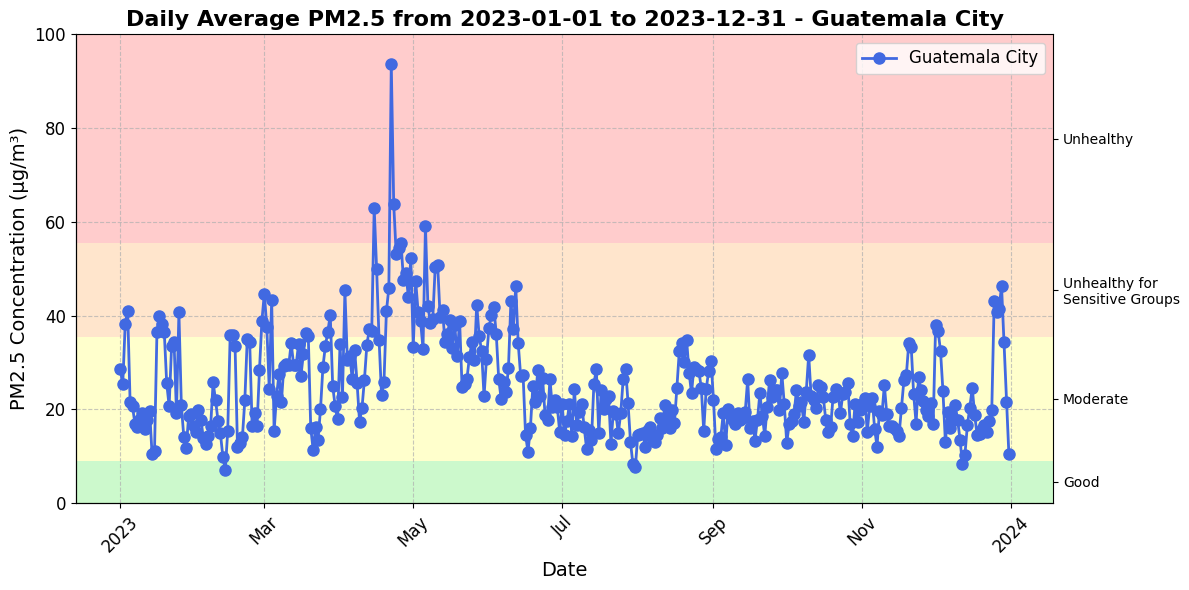

In [ ]:
# --- Data Selection and Filtering ---

# Select data for the specified location (lat, lon) using nearest neighbor interpolation.
time_step_data = concentration.sel(latitude=lat, longitude=lon, method='nearest')

# Sort the data by time and select the last 'n' records (most recent data).
time_step_data = time_step_data.sortby('time')[-n:]

# Extract the time values for plot labeling.
period = time_step_data.time

# Find out max in data
max1=(time_step_data.max().values.tolist()//50 +1)*50

# --- Creating the Plot ---

# Create a new figure with specified dimensions.
fig = plt.figure(figsize=(12, 6))
# Add a subplot to the figure (1x1 grid, first subplot).
ax = fig.add_subplot(111)

# Plot the time series data with styling.
time_step_data.plot(ax=ax, label=city, color='royalblue', marker='o', linestyle='-',
                    markersize=8, linewidth=2)

# --- Plot Enhancements ---

# Add gridlines for better readability.
ax.grid(True, linestyle='--', alpha=0.7)
# Remove top and right spines of the plot frame.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Rotate x-axis tick labels for better visibility.
ax.xaxis.set_tick_params(rotation=45, labelsize=12)
# Adjust y-axis tick label size.
ax.yaxis.set_tick_params(labelsize=12)

# Generate dynamic title and labels.
p_end = str(period[-1].values)[0:10]  # Extract end date from period.
p_start = str(period[0].values)[0:10]  # Extract start date from period.
save_name = 'Daily Average {} from {} to {} - {}'.format(species_str, p_start, p_end, city)
ax.set_title(save_name, fontsize=16, fontweight='bold')  # Set plot title.
ax.set_xlabel('Date', fontsize=14)  # Set x-axis label.
ax.set_ylabel(f'{species_str} Concentration ({concentration.attrs["units"]})',
              fontsize=14)  # Set y-axis label.

# Add legend and adjust layout.
ax.legend(fontsize=12)
ax.set_ylim(0, max1)  # Set y-axis limits.


# --- AQI Background Coloring ---

# Define AQI bins, labels, and colors.
if species == 'pm2p5':
  bins = [0, 9.0, 35.5, 55.5, 125.5, 225.5, 1000]
elif species == 'no2':
  bins =  [0, 55, 115, 255, 355, 425, 1000]
elif species == 'go3':
  bins =  [0, 55, 70, 85, 105, 200, 1000] # Ozone AQI breakpoints
labels = ['Good', 'Moderate', 'Unhealthy for\nSensitive Groups',
            'Unhealthy', 'Very Unhealthy', 'Hazardous']
colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']


bins = sorted([0, 9.0, 35.5, 55.5, 125.5, 225.5, 1000]  + [max1])
tick_positions = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
bins = [x for x in bins if x <= max1]

# Add background color bands for AQI categories.
for i in range(len(bins) - 1):
    ax.axhspan(bins[i], bins[i + 1], facecolor=colors[i], alpha=0.2)

# --- Add Right Y-Axis Labels ---

# Create a secondary y-axis for AQI labels.
ax2 = ax.twinx()

# Set y-axis ticks and labels for AQI categories.
tick_positions = bins[:-1] + np.diff(bins) * 0.5
ax2.set_yticks(tick_positions)
ax2.set_ylim(0, max1)
ax2.set_yticklabels(labels[:len(bins)-1], fontsize=10)

plt.tight_layout()  # Adjust plot layout for better spacing.
# --- Save and Cleanup ---

# Save the plot to a file.
plt.savefig(output_path_plots + save_name + ".png", dpi=300)



# Estimate monthly mean

In [ ]:
%%time
# creating monthly mean
# Sort the index (time coordinate) before resampling
concentration_daily = concentration.sortby('time')
concentration_monthly= concentration_daily.resample(time='1M').mean(dim='time')
concentration_monthly

CPU times: user 109 ms, sys: 50 µs, total: 109 ms
Wall time: 125 ms


<xarray.DataArray 'pm2p5' (time: 132, latitude: 23, longitude: 45)> Size: 546kB
array([[[ 6.5023184,  6.357191 ,  8.072391 , ...,  5.2514687,
          5.886769 ,  5.014251 ],
        [ 6.6805353,  6.7246866,  7.1313453, ...,  5.062634 ,
          5.379576 ,  5.5870976],
        [ 6.6735034,  6.928034 ,  6.967859 , ...,  5.706565 ,
          4.9716797,  5.2808876],
        ...,
        [ 5.834599 ,  6.056847 ,  6.317529 , ..., 19.134304 ,
         19.602736 , 23.959568 ],
        [ 4.5163045,  4.7074866,  4.8104515, ..., 23.513313 ,
         21.996136 , 19.82617  ],
        [ 3.9346423,  4.0031476,  4.082552 , ..., 25.575075 ,
         27.0191   , 24.65465  ]],

       [[ 5.2702622,  5.042271 ,  6.2758017, ...,  6.9413285,
          6.369902 ,  5.6757402],
        [ 5.268916 ,  5.1492076,  5.630876 , ...,  7.5901155,
          6.4553294,  6.337999 ],
        [ 5.19056  ,  5.3297424,  5.5758405, ...,  7.8801475,
          6.535147 ,  6.473536 ],
...
        [ 4.4538364,  4.383226 ,  4.3372703, ..., 13.212941 ,
         12.839955 , 14.930804 ],
        [ 5.1474533,  5.076602 ,  4.999831 , ..., 18.47232  ,
         17.278433 , 15.739012 ],
        [ 5.585797 ,  5.545471 ,  5.469991 , ..., 20.133467 ,
         24.579254 , 23.383984 ]],

       [[ 3.5283372,  3.5670161,  4.9371953, ...,  5.8776836,
          5.850895 ,  5.1671004],
        [ 3.7662585,  3.88467  ,  4.7986426, ...,  6.102062 ,
          5.654258 ,  5.3621564],
        [ 3.9471602,  4.067137 ,  4.760221 , ...,  6.2194023,
          5.2826986,  5.0335083],
        ...,
        [ 5.357095 ,  5.4550714,  5.6468363, ..., 17.386002 ,
         16.444345 , 18.893673 ],
        [ 4.35231  ,  4.433117 ,  4.444749 , ..., 22.51759  ,
         19.763222 , 18.172726 ],
        [ 4.102659 ,  4.080516 ,  4.0693803, ..., 22.668318 ,
         26.918068 , 25.740675 ]]], dtype=float32)
Coordinates:
  * latitude     (latitude) float64 184B 21.5 20.75 20.0 19.25 ... 6.5 5.75 5.0
  * longitude    (longitude) float64 360B -107.0 -106.2 -105.5 ... -74.75 -74.0
    model_level  float64 8B ...
  * time         (time) datetime64[ns] 1kB 2013-01-31 2013-02-28 ... 2023-12-31
Attributes:
    units:    µg/m³

# Save data

In [ ]:
# saving the data to a NetCDF file
start_date=str(concentration_monthly.time[0].values)[0:7].replace('-','_')
end_date=str(concentration_monthly.time[-1].values)[0:7].replace('-','_')


out_filename =  ('Monthly_Averages_CAMS_{}_{}_to_{}.nc').format( species,start_date, end_date)
print('saving '+ out_filename)

concentration_monthly.to_netcdf(output_path+out_filename)

saving Monthly_Averages_CAMS_pm2p5_2013_01_to_2023_12.nc


# Load saved data


in case of future usage when monthly data is already created, you can load libraries cell, and define

In [ ]:
#remove the # in the next lines and run the cell if you want to just work with a loaded data
input_filename =   ('Monthly_Averages_CAMS_{}_{}_to_{}.nc').format( species,start_date, end_date)
air_q=xr.open_mfdataset(output_path+input_filename)
air_q

<xarray.Dataset> Size: 548kB
Dimensions:      (time: 132, latitude: 23, longitude: 45)
Coordinates:
  * time         (time) datetime64[ns] 1kB 2013-01-31 2013-02-28 ... 2023-12-31
  * longitude    (longitude) float64 360B -107.0 -106.2 -105.5 ... -74.75 -74.0
  * latitude     (latitude) float64 184B 21.5 20.75 20.0 19.25 ... 6.5 5.75 5.0
    model_level  float64 8B ...
Data variables:
    pm2p5        (time, latitude, longitude) float32 546kB dask.array<chunksize=(132, 23, 45), meta=np.ndarray>

# Plotting global monthly maps for the period of interest

set your input

In [ ]:
# --- Setting Visualization Parameters ---

# Define the time range for data selection.
# This will select data from January 2013 to December 2023.
time_sel_arr = ['2023-01','2023-02','2023-03','2023-04','2023-05','2023-06', '2023-12']

# Define a level or threshold for data selection.
# The meaning of 'lv_sel' is not immediately clear without more context,
# but it might represent a specific altitude, concentration level, or a model level.
lv_sel = 60

# Set the maximum value for the color scale based on the pollutant being visualized.
# This ensures the color range is appropriate for the data.
if species == 'go3':  # Ground-level ozone (O3)
    vmax_set = 100
elif species == 'no2':  # Nitrogen dioxide (NO2)
    vmax_set = 30
elif species == 'pm2p5':  # Particulate matter 2.5 (PM2.5)
    vmax_set = 200

# Set the minimum value for the color scale to 0.
# Pollutant concentrations are typically non-negative.
vmin_set = 0

# Define the colormap to use for the visualization.
# 'plasma' is a common colormap that transitions from dark blue to bright yellow.
colormap = 'plasma'

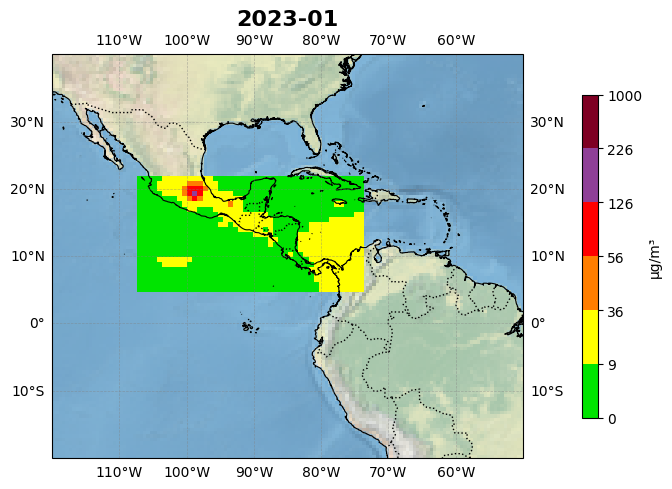

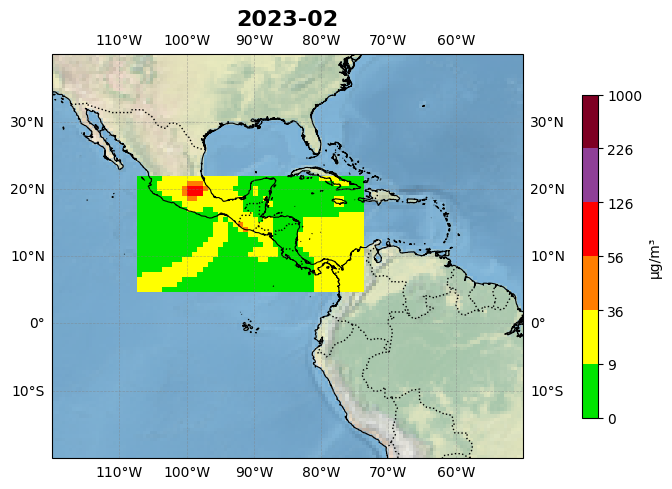

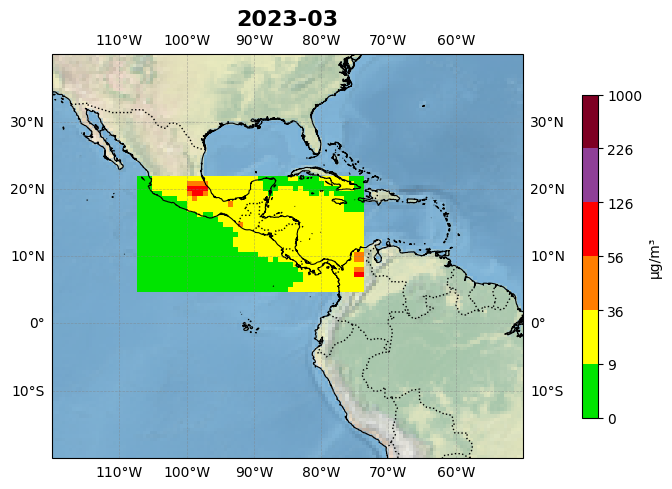

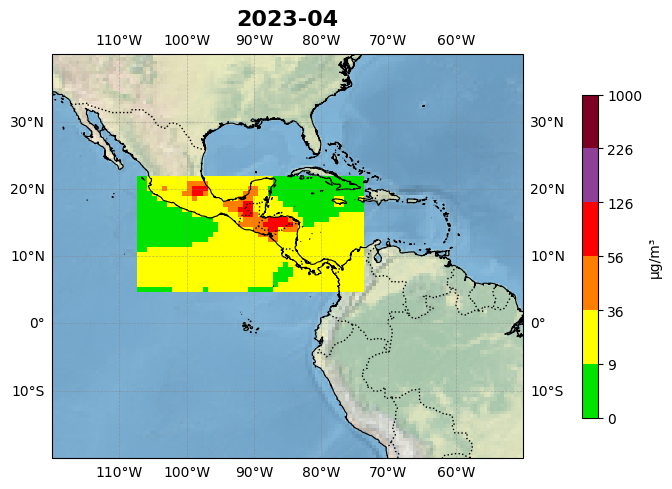

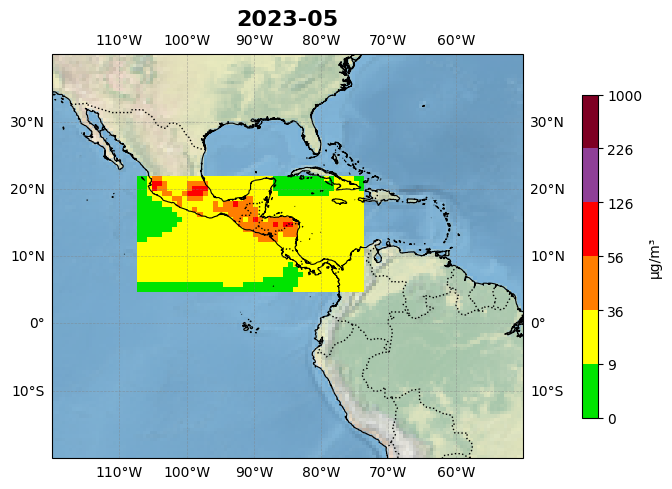

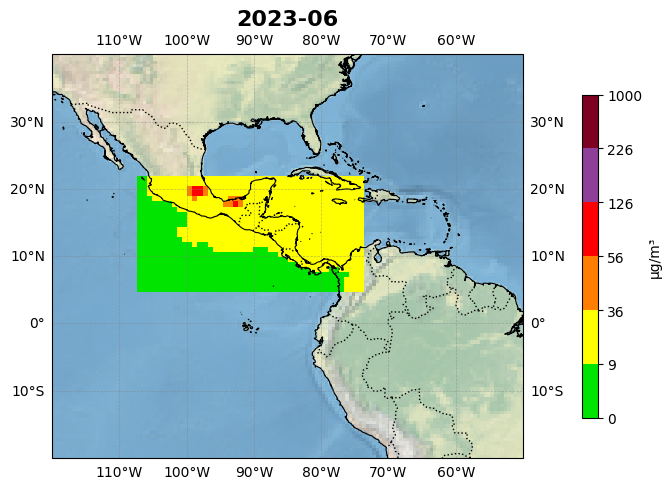

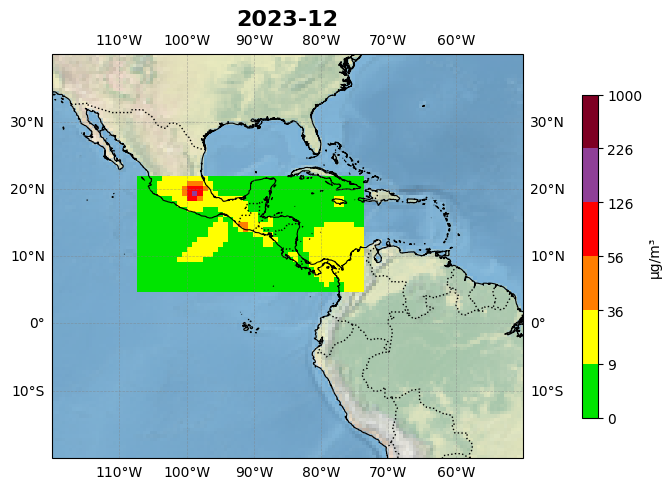

In [ ]:
# Import the necessary class
from cartopy.io.img_tiles import Stamen
for time_step in time_sel_arr:
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 5))

    time_step_data = concentration_monthly.sel(time=time_step)

    # Define AQI bins, labels, and colors.
    if species == 'pm2p5':
      bins = [0, 9.0, 35.5, 55.5, 125.5, 225.5, 1000]
    elif species == 'no2':
      bins =  [0, 55, 115, 255, 355, 425, 1000]
    elif species == 'go3':
      bins =  [0, 55, 70, 85, 105, 200, 1000] # Ozone AQI breakpoints
    labels = ['Good', 'Moderate', 'Unhealthy for\nSensitive Groups',
                'Unhealthy', 'Very Unhealthy', 'Hazardous']
    colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']

    cmap = mpl.colors.ListedColormap(colors) # Change to ListedColormap(colors)
    norm = mpl.colors.BoundaryNorm(bins, cmap.N) # Change to BoundaryNorm(bins, cmap.N)
    # --- Plot Enhancements ---
    im = time_step_data.plot(ax=ax, norm=norm,
                             cmap=cmap,
                            transform=ccrs.PlateCarree(),  # Specify transformation for correct projection
                            cbar_kwargs={'shrink': 0.8, 'label': concentration_monthly.attrs.get('units', '')})  # Adjust colorbar


    # Add coastlines, gridlines, and title
    ax.coastlines(resolution='10m', linewidth=0.8, color='black')  # Higher resolution coastlines
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')  # Add gridlines
    ax.set_title(time_step, fontsize=16, fontweight='bold')  # Larger, bolder title

    # Add country boundaries
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Add a background image (e.g., Stamen Terrain) for context
    ax.stock_img() # uncomment this
    # or, use following lines instead of the above line
    #tiler = Stamen('terrain-background')
    #ax.add_image(tiler, 3) # zoom level for Stamen Terrain
    ax.set_extent([-120, -50, -20, 40], crs=ccrs.PlateCarree())


    # --- Adjust Layout ---
    plt.tight_layout()

CPU times: user 1.78 s, sys: 1.07 s, total: 2.85 s
Wall time: 2.1 s


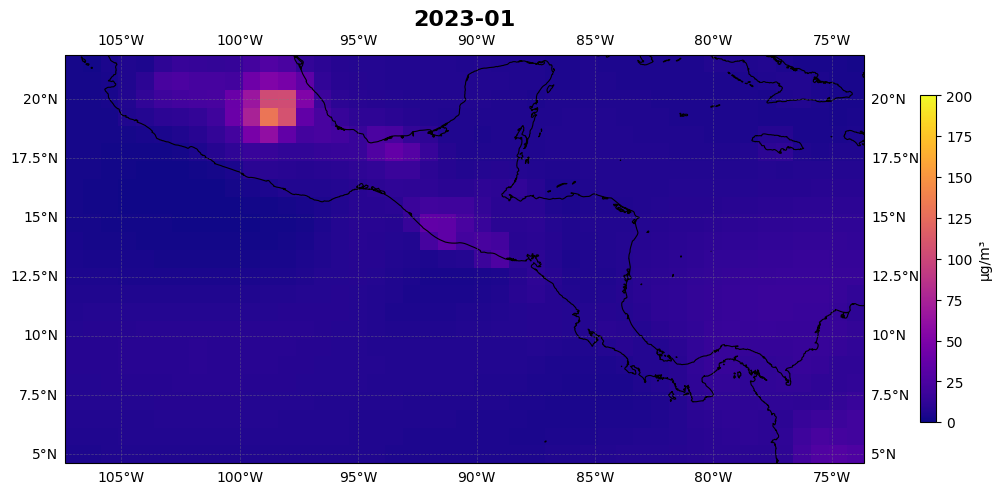

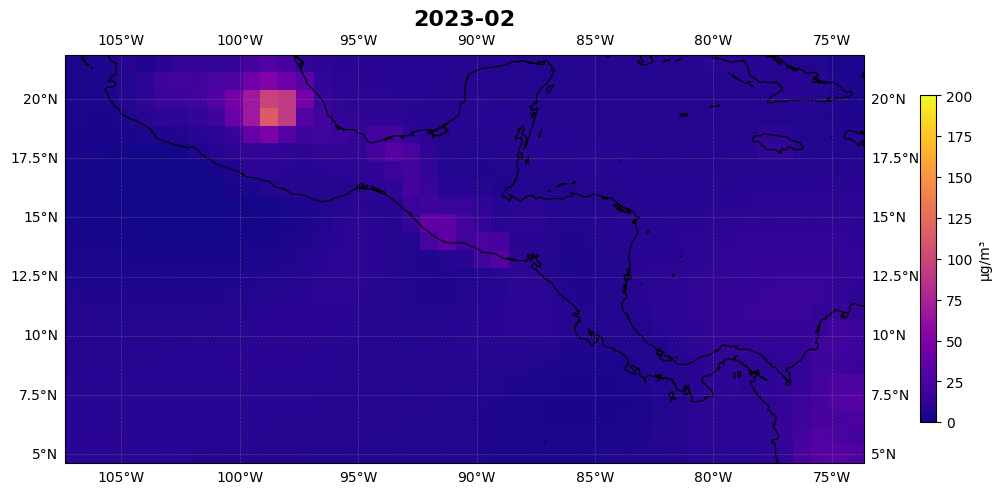

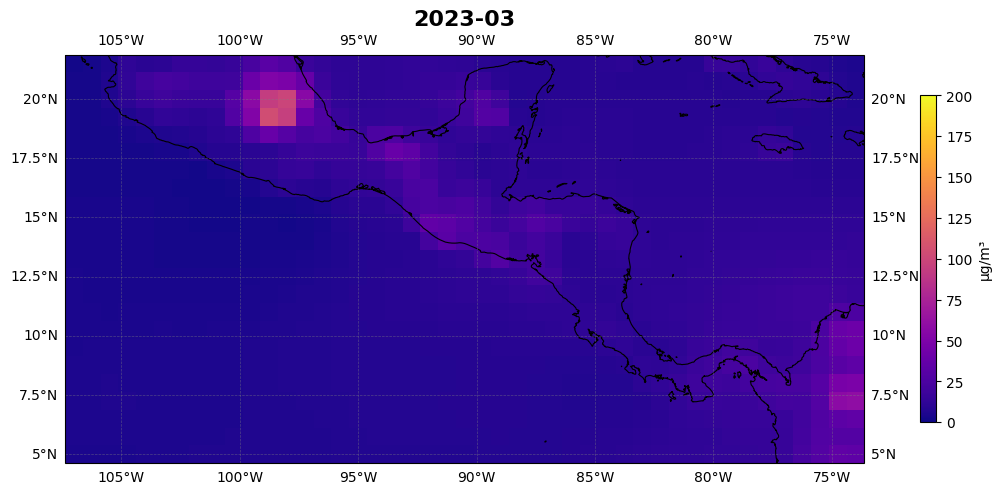

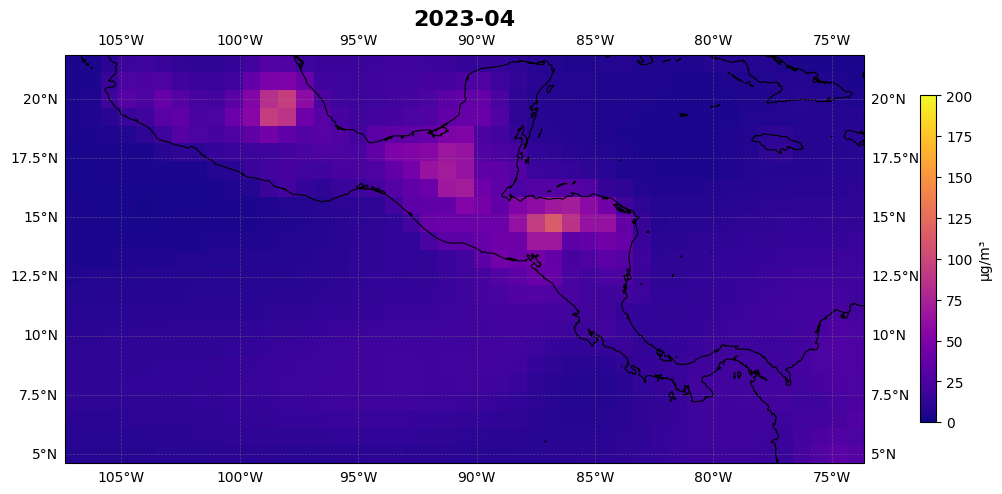

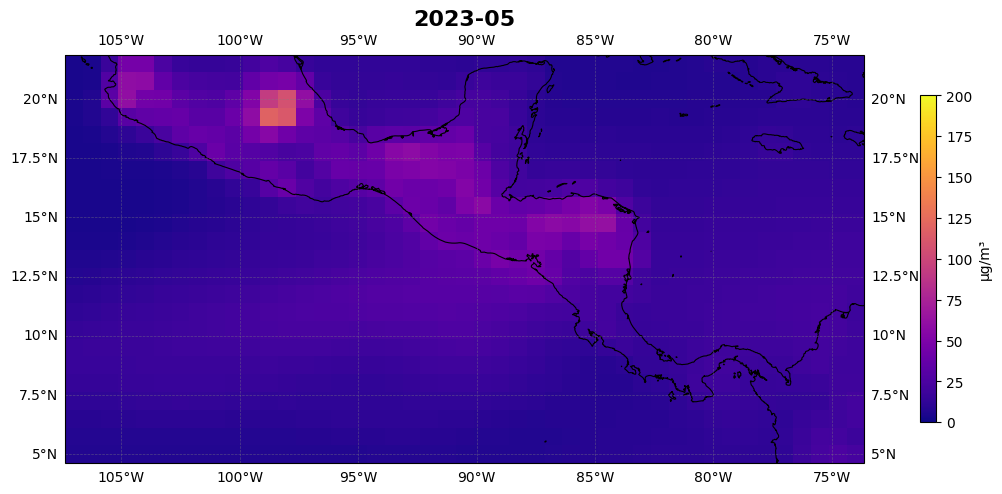

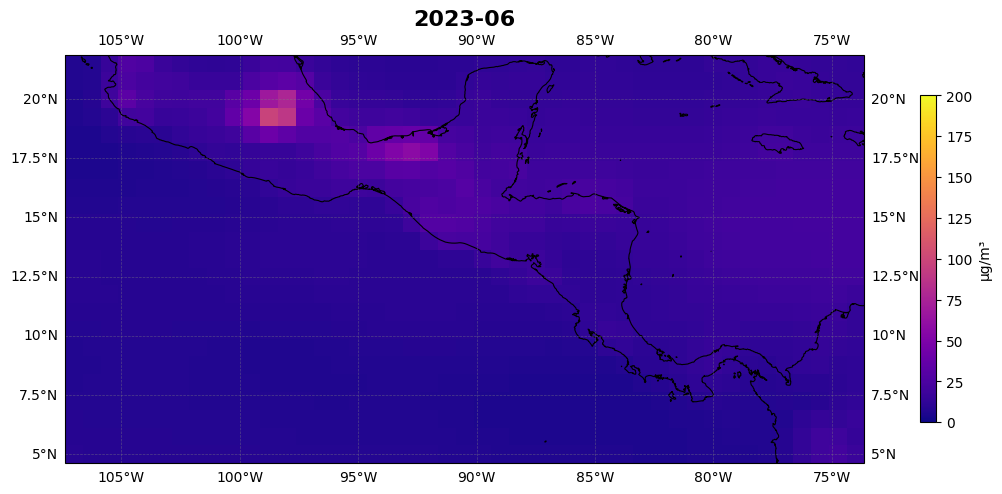

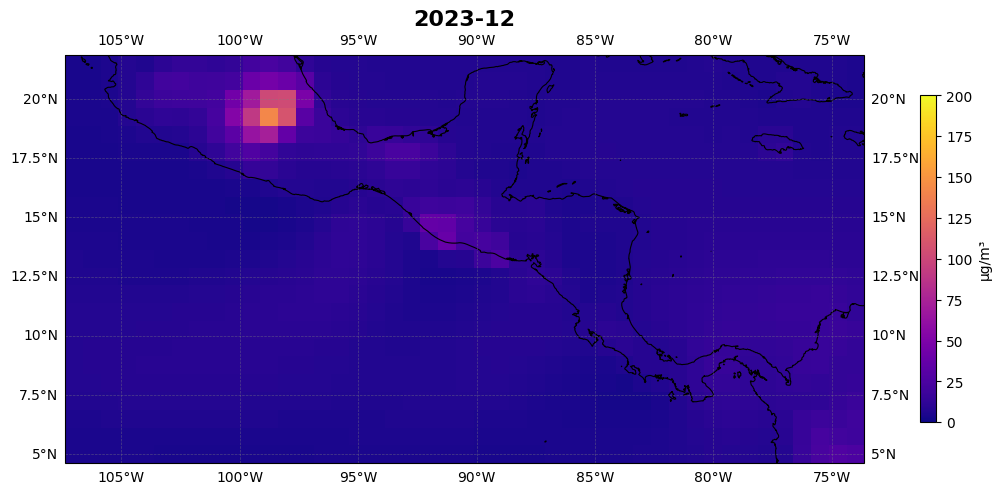

In [ ]:
%%time
for time_step in time_sel_arr:
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 5))

    time_step_data = concentration_monthly.sel(time=time_step)

    # --- Plot Enhancements ---
    im = time_step_data.plot(ax=ax, cmap=colormap, vmin=vmin_set, vmax=vmax_set,
                            transform=ccrs.PlateCarree(),  # Specify transformation for correct projection
                            cbar_kwargs={'shrink': 0.8, 'label': concentration_monthly.attrs.get('units', '')})  # Adjust colorbar

    # Add coastlines, gridlines, and title
    ax.coastlines(resolution='10m', linewidth=0.8, color='black')  # Higher resolution coastlines
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')  # Add gridlines
    ax.set_title(time_step, fontsize=16, fontweight='bold')  # Larger, bolder title

   # --- Adjust Layout ---
    plt.tight_layout()

set your plot input

# Plotting time series of monthly concentrations for the locations of interest

set your plot input

In [ ]:
cities = {
    "Mexico City": [19.4326,-99.1332 ],
    "Guatemala City": [14.6349,-90.5069 ],
    "Belize City":  [17.5046,-88.1962 ]
}

period=['2013-01','2023-12']
period


['2013-01', '2023-12']

City: Mexico City, Latitude: 19.4326, Longitude: -99.1332
City: Guatemala City, Latitude: 14.6349, Longitude: -90.5069
City: Belize City, Latitude: 17.5046, Longitude: -88.1962
CPU times: user 1.83 s, sys: 275 ms, total: 2.11 s
Wall time: 1.89 s


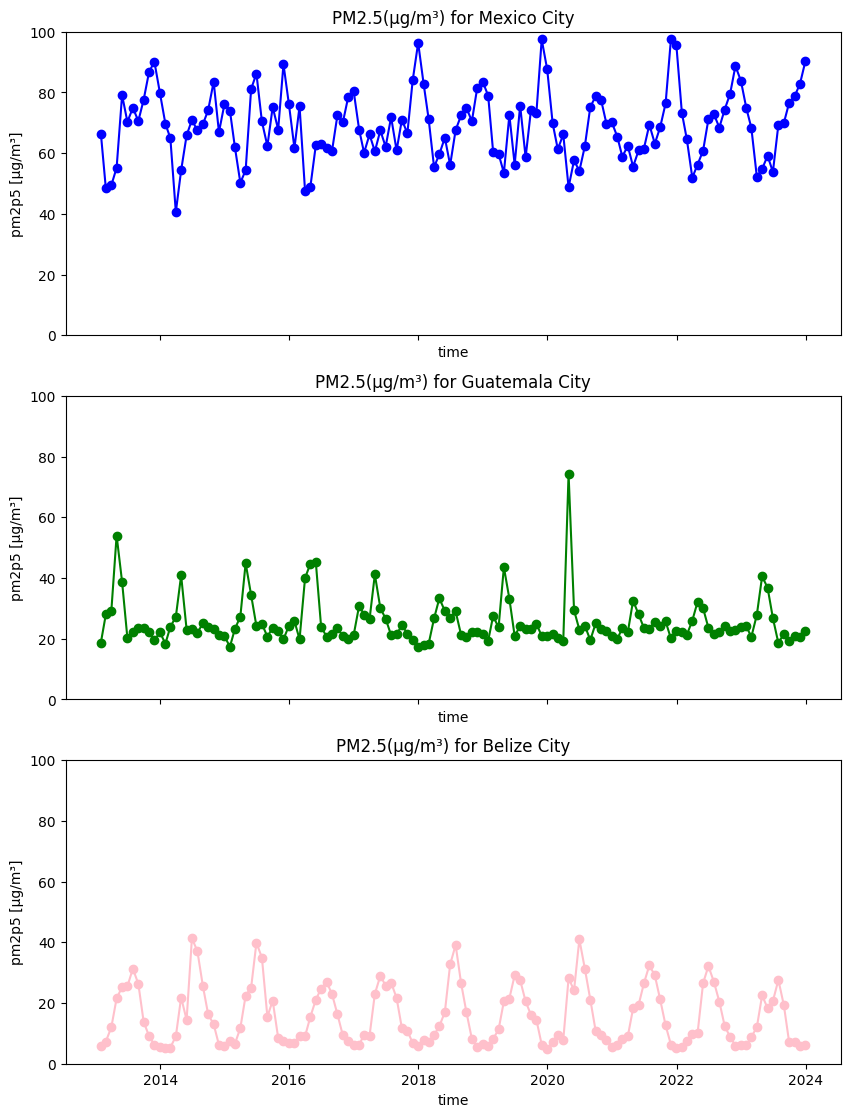

In [ ]:
%%time
time_s_cons=concentration_monthly.sel(time=slice(*period))
#plotting
# Generate a colormap with enough unique colors for the cities
num_cities = len(cities)
cmap = plt.get_cmap("tab20c")
colors = cmap(np.linspace(0, 1, num_cities))
# or define your specific colors
colors = ['b','green','pink','gray','purple','red']
if len(cities)<1:
    fig,axs=plt.subplots()
else:
    fig,axs=plt.subplots(nrows=len(cities),sharex=True)
    axs=axs.ravel()
for idx, (city, coordinates) in enumerate(cities.items()):
    lat,lon=coordinates
    print(f"City: {city}, Latitude: {lat}, Longitude: {lon}")
    if len(cities)>1:
        ax_sel=axs[idx]
    else:
        ax_sel=axs


    nearest_location = time_s_cons.sel(latitude=lat, longitude=lon, method='nearest')
    nearest_location.plot(ax=ax_sel,label=city, c=colors[idx],marker='o', linestyle='-')
    title_str=species_str+'({}) for {}'.format(concentration_monthly.attrs['units'],city)
    ax_sel.set_title(title_str)
    ax_sel.set_ylim(0,100)
fig.set_size_inches(10,4*len(cities))
fig.subplots_adjust(top=0.97,wspace=0.3)
save_name='monthly_{}_{}_{}_cities'.format(species, period[0], period[1])
plt.savefig(output_path_plots+save_name,dpi=300)
del time_s_cons

City: Mexico City, Latitude: 19.4326, Longitude: -99.1332
City: Guatemala City, Latitude: 14.6349, Longitude: -90.5069
City: Belize City, Latitude: 17.5046, Longitude: -88.1962
CPU times: user 1.45 s, sys: 575 ms, total: 2.03 s
Wall time: 1.41 s


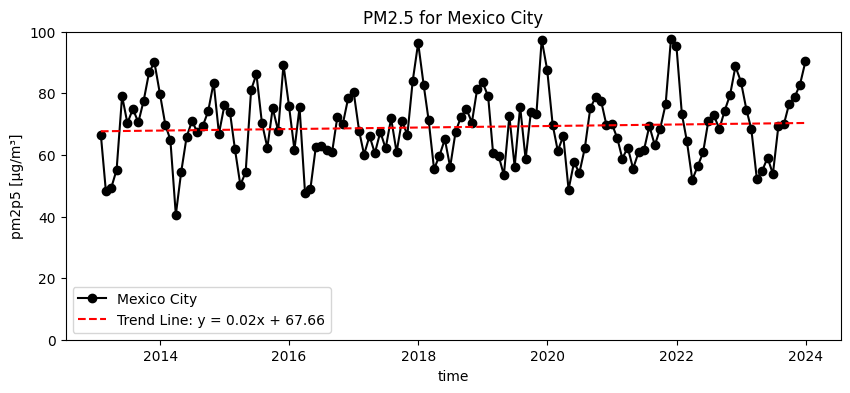

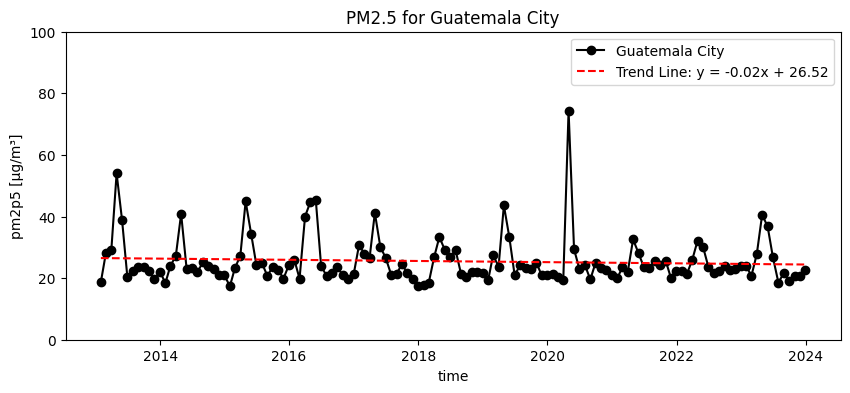

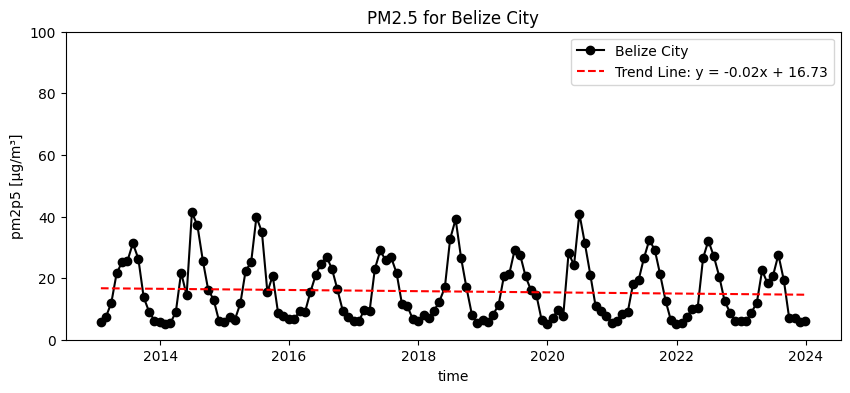

In [ ]:
%%time

num_cities = len(cities)
time_s_cons=concentration_monthly.sel(time=slice(*period))

for idx, (city, coordinates) in enumerate(cities.items()):
    fig,ax=plt.subplots()
    lat,lon=coordinates
    print(f"City: {city}, Latitude: {lat}, Longitude: {lon}")
    nearest_location = time_s_cons.sel(latitude=lat, longitude=lon, method='nearest')
    nearest_location.plot(label=city, c='k',marker='o', linestyle='-')
    title_str=species+'({})'.format(time_s_cons.attrs['units'])
    # Calculate the trend line
    # Convert datetime64 to numeric values
    time_val=nearest_location.time.values
    time_arr=np.linspace(1,len(nearest_location.time),len(nearest_location.time))
    coefficients =np.polyfit(time_arr,nearest_location.values,deg=1)
    trend_line = np.polyval(coefficients, time_arr)
    # slope, intercept, r_value, p_value, std_err = stats.linregress(nearest_location.time, nearest_location)

    # coefficients =np.polyfit(numeric_time_values,nearest_location.values,deg=1)
    # Create the trend line
    # trend_line = np.polyval(coefficients, numeric_time_values)
    equation = f'Trend Line: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
    plt.plot(time_val,trend_line,label=equation, linestyle='--', color='red')
    #plt.text(nearest_location.time.values[-1], trend_line[-1]-5, equation, ha='right', va='center', color='blue')
    #plot set up
    ax.set_title('{} for {}'.format(species_str,city))
    ax.legend()
    ax.set_ylim(0,100)
    fig.set_size_inches(10,4)
    save_name='monthly_{}_{}_{}_{}'.format(species, period[0],  period[1],city)
    plt.savefig(output_path_plots+save_name,dpi=300)
del time_s_cons

# Plotting time series of annual concentrations for the locations of interest

set your plot input

In [ ]:
annual_period=['2013','2023']

In [ ]:
%%time
# annual mean
annual_data = concentration_monthly.resample(time='1Y').mean()
annual_data.time
time_s_cons=annual_data.sel(time=slice(*annual_period))

CPU times: user 18.9 ms, sys: 0 ns, total: 18.9 ms
Wall time: 20.2 ms


City: Mexico City, Latitude: 19.4326, Longitude: -99.1332
City: Guatemala City, Latitude: 14.6349, Longitude: -90.5069
City: Belize City, Latitude: 17.5046, Longitude: -88.1962
CPU times: user 1.02 s, sys: 601 ms, total: 1.62 s
Wall time: 1.03 s


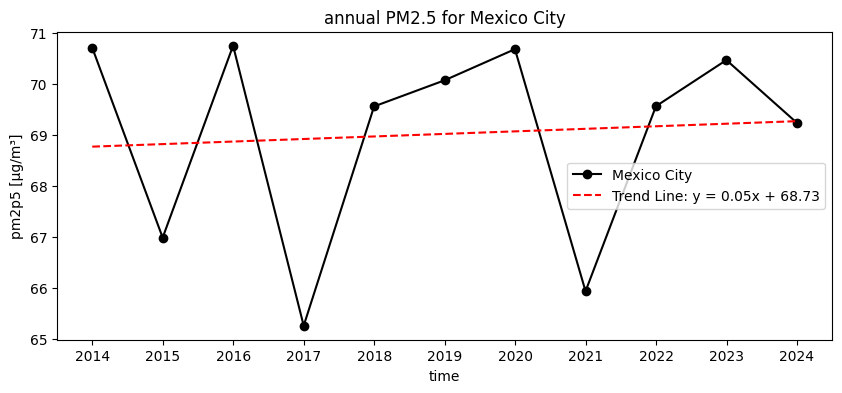

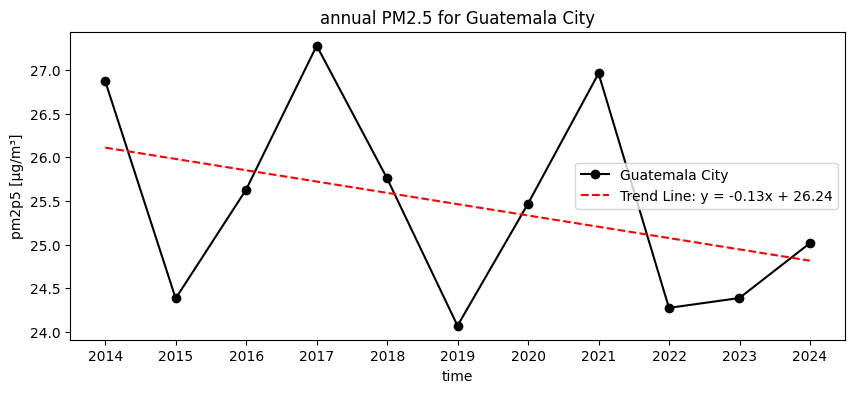

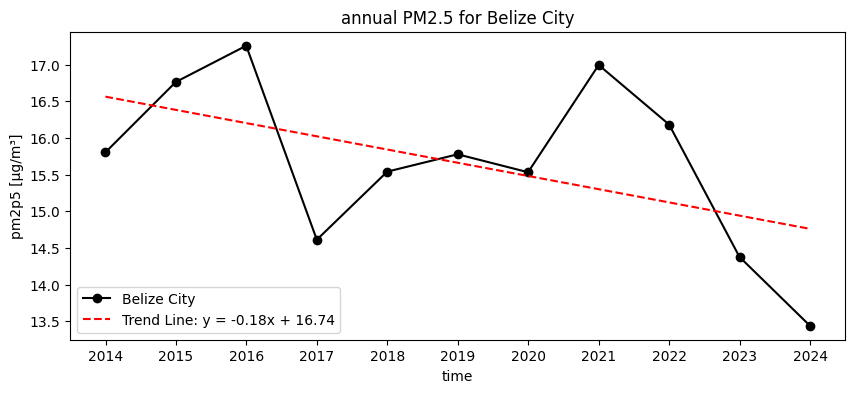

In [ ]:
%%time

for idx, (city, coordinates) in enumerate(cities.items()):
    fig,ax=plt.subplots()
    lat,lon=coordinates
    print(f"City: {city}, Latitude: {lat}, Longitude: {lon}")
    nearest_location = time_s_cons.sel(latitude=lat, longitude=lon, method='nearest')
    nearest_location.plot(label=city, c='k',marker='o', linestyle='-')
    title_str=species+'({})'.format(time_s_cons.attrs['units'])
    # Calculate the trend line
    time_val=nearest_location.time.values
    time_arr=np.linspace(1,len(nearest_location.time),len(nearest_location.time))
    coefficients =np.polyfit(time_arr,nearest_location.values,deg=1)
    trend_line = np.polyval(coefficients, time_arr)

    # Create the trend line
    equation = f'Trend Line: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
    plt.plot(time_val,trend_line,label=equation, linestyle='--', color='red')
    #legend, title, and plot size set up
    ax.set_title('annual {} for {}'.format(species_str,city))
    ax.legend()
    fig.set_size_inches(10,4)
    save_name='Annual_{}_{}_{}_{}'.format(species, annual_period[0], annual_period[1],city)
    plt.savefig(output_path_plots+save_name+'.jpg',dpi=300)
